In [99]:
import pandas as pd
import numpy as np

df = pd.read_csv('sample_900.csv')
df = df[df['sentiment'].isin(['0', '1', '2'])]
df = df.drop(df.columns[[0, 3]], axis=1)
df = df.dropna()
df.head()

,Group,Title,date,likes,comment,sentiment
0,NMIXX,별별별 (See that),2024-08-19T09:01:15Z,0.0,와씨 이번 컴백곡 미쳤다 (아직 안봄) 보고 왔는데 개지리누 춤연습 영상 빨리 빨리...,2
1,NMIXX,별별별 (See that),2024-08-19T09:04:49Z,0.0,오늘만 기다렸다,2
2,NMIXX,Party O’Clock,2023-07-11T19:22:59Z,0.0,아니 노래들이 점점 그냥 대중적으로 가자 제발 음악성 어쩌고저쩌고 모르겠고 듣기 편...,1
3,NMIXX,Party O’Clock,2023-07-12T10:27:02Z,4.0,근데 뉴진스 원래 조회수는 잘 안나옴 데뷔곡부터도 조회수 밀리는데,1
4,NMIXX,蜚蜚 (FEIFEI),2024-07-31T21:00:17Z,0.0,짜증나네.. 하필 ㅉㄲ 어로 노랠 부르다니..,0


In [100]:
import MeCab
# MeCab 사전 경로 설정 (시스템에 맞게 경로 수정)
mecab = MeCab.Tagger("-d /opt/homebrew/lib/mecab/dic/mecab-ko-dic")

stopwords = []

def extract_nouns(string, stopwords):
    parsed_string = mecab.parse(string)
    lines = parsed_string.splitlines()

    nouns = []

    for line in lines:
        parts = line.split('\t')
        if len(parts) > 1 and 'NNG' in parts[1] and parts[0] not in stopwords:  # NNG: 일반 명사
            nouns.append(parts[0])

    return nouns

df['words'] = df['comment'].apply(lambda x: extract_nouns(x, stopwords)) 

In [101]:
# 한글 감성어 사전(KNU)
import json
import pandas as pd

with open('SentiWord_info.json', encoding='utf-8-sig', mode='r') as f: 
  SentiWord_info = json.load(f)

sentiword_dic = pd.DataFrame(SentiWord_info)

In [102]:
df['words'][0]

['이번', '컴백', '곡', '봄', '개지', '춤', '연습', '영상']

In [103]:
def sentiment_by_lexicon(words):

    sentiment = 0
    for word in words:
        for i in range(0, len(sentiword_dic)):
            if sentiword_dic.word[i] in word:              
                sentiment += int(sentiword_dic.polarity[i])

    return sentiment


# apply 메서드를 사용하여 sentiment_code 열 생성
df['sentiment_score_l'] = df['words'].apply(sentiment_by_lexicon)

# sentiment 점수를 클래스로 분류
def code_sentiment(value):
    if value > 0:
          return '2'
    elif value == 0:
        return '1'
    else:
        return '0'

# apply 메서드를 사용하여 sentiment_code 열 생성
df['sentiment_l'] = df['sentiment_score_l'].apply(code_sentiment)


정확도: 0.27


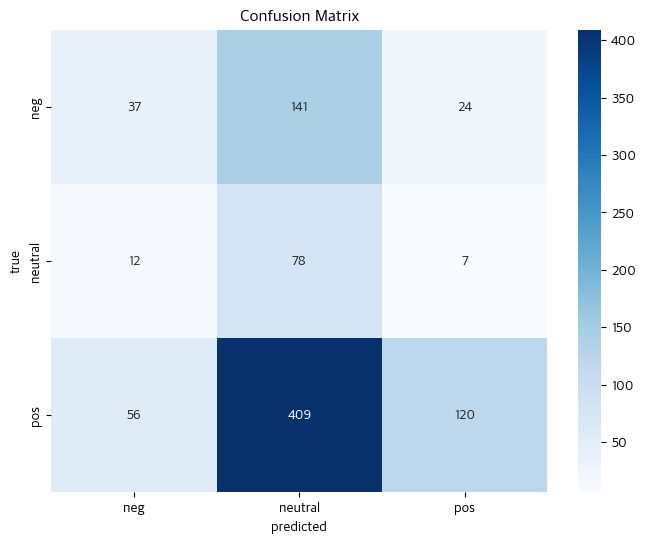

In [111]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# 폰트 패밀리 이름을 정확히 지정
plt.rc('font', family='Apple SD Gothic Neo')  # 폰트 패밀리 이름
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 표시

# 예시 데이터 생성
y_true = df['sentiment']
y_pred = df['sentiment_l']
# 정확도 계산
accuracy = accuracy_score(y_true, y_pred)
print(f"정확도: {accuracy:.2f}")

# 혼동 행렬 계산
cm = confusion_matrix(y_true, y_pred)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['neg', 'neutral', 'pos'], yticklabels=['neg', 'neutral', 'pos'])
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('Confusion Matrix')
plt.show()